In [1]:
import json
import sys
import os
import numpy as np
import skimage
from scipy import ndimage
from scipy import special
from scipy import sparse
import anndata
import nibabel as nib
import pandas as pd
import datashader as ds
import time
from sklearn.decomposition import PCA
import collections
import pickle as pkl
import zarr
import h5py
import anndata as ad

import ants
import nibabel as nib

from dredFISH.Analysis.__init__plots import *
sns.set_style('white')

from dredFISH.Analysis import basicu

sys.path.insert(0, '/home/fangming/projects/dredfish/packages/PySpots')
from MERFISH_Objects.FISHData import *

# Load data

In [2]:
prj_dir = '/bigstore/GeneralStorage/fangming/projects/neural_net/'
dat_dir = prj_dir + 'data_dump/'
# res_dir = prj_dir + 'data_dump/'

In [3]:
f = f'{dat_dir}/smrt_nn_v1_April26.h5ad'
adata = anndata.read(f)

In [4]:
# analysis metadata
meta_path = '/bigstore/GeneralStorage/fangming/projects/dredfish/data_dump/analysis_meta_Mar31.json'
# analysis
with open(meta_path, 'r') as fh:
    meta = json.load(fh)

In [5]:
def plot_celltype_heatmap(Xmat, splitat, splitat_v, title='scRNA-seq'):
    """
    """
    # plot 
    fig, ax = plt.subplots(1, 1, figsize=(6, 10))
    cbar_ax = fig.add_axes([.97, .4, .01, .2])
    
    Xmat = Xmat.fillna(0)
    sns.heatmap(Xmat, 
                yticklabels=True, xticklabels=True, 
                vmax=3, vmin=-3, cmap='coolwarm', 
                cbar_ax=cbar_ax,
                cbar_kws=dict(label='normed features'),
                ax=ax)
    ax.set_title(f'{title}')
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=10, rotation=0)
    # lines
    ax.hlines(1+np.array(splitat), 0, Xmat.shape[1], linewidth=0.5, color='gray')
    ax.vlines(1+np.array(splitat_v), 0, Xmat.shape[0], linewidth=0.5, color='gray')
    return


In [6]:
# predicted labels???
level = 'subclass_label'
row_order = meta['l3_clsts']
col_order = np.arange(24)# meta['l3_bits']

# cluster mean reference
# refdata (X)
Xclst, _ = basicu.group_mean(
    adata.X, 
    adata.obs[level].values, 
    row_order)
Xclst = basicu.zscore(Xclst, allow_nan=True, axis=0)
Xclst = Xclst[:,col_order]
Xclst = pd.DataFrame(Xclst, index=row_order, columns=col_order)

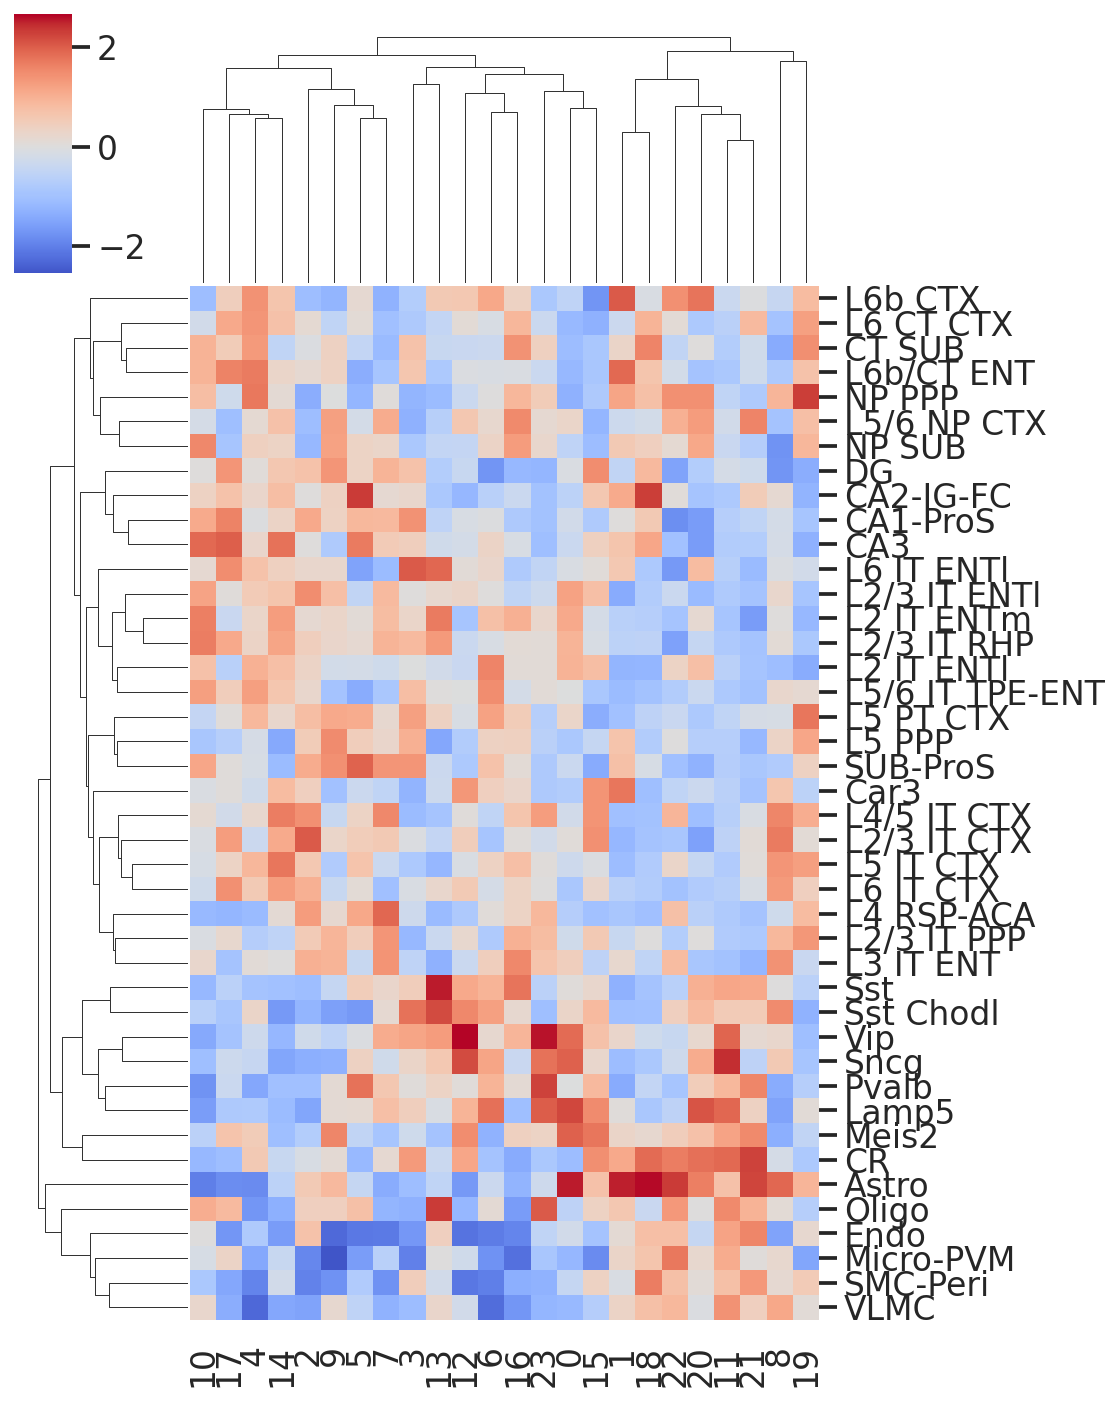

In [7]:
sns.clustermap(Xclst, center=0, 
               xticklabels=True,
               yticklabels=True,
               cmap='coolwarm', 
               figsize=(8,10),
              )

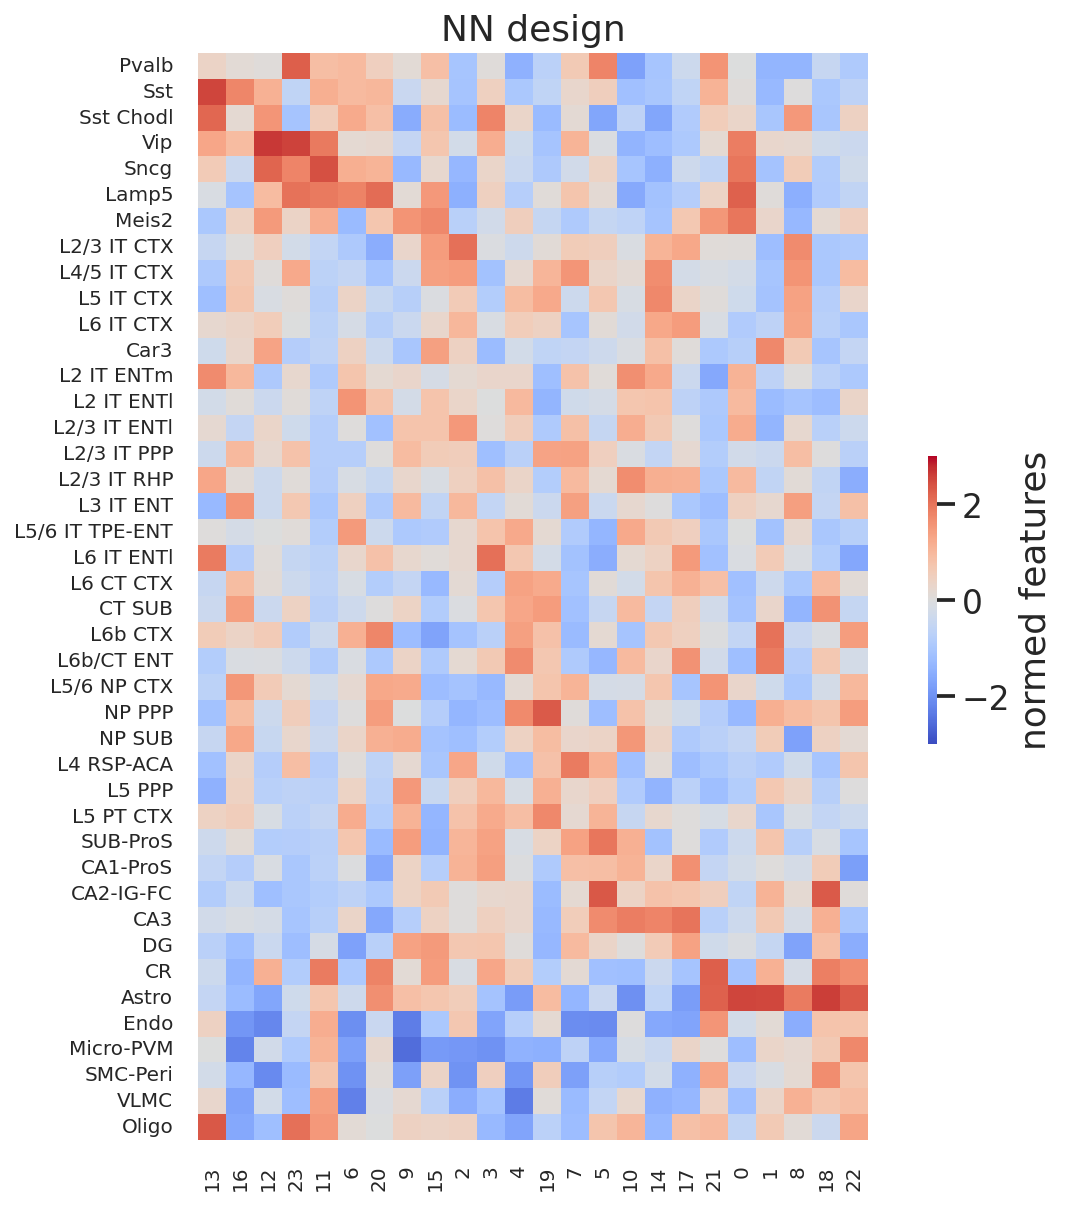

In [8]:
# XclstP, rows, cols = basicu.diag_matrix_rows(
#                        Xclst.values, 
#                        Xclst.index.values, 
#                        Xclst.columns.values,
#                         )
# XclstP = pd.DataFrame(XclstP, index=rows, columns=cols)

XclstPt, cols, rows = basicu.diag_matrix_rows(
                       Xclst.values.T, 
                        )
XclstP = pd.DataFrame(XclstPt.T, 
                      index=Xclst.index.values[rows], 
                      columns=Xclst.columns.values[cols],
                     )

plot_celltype_heatmap(XclstP, 
                      [],
                      [],
                      'NN design',
                      )

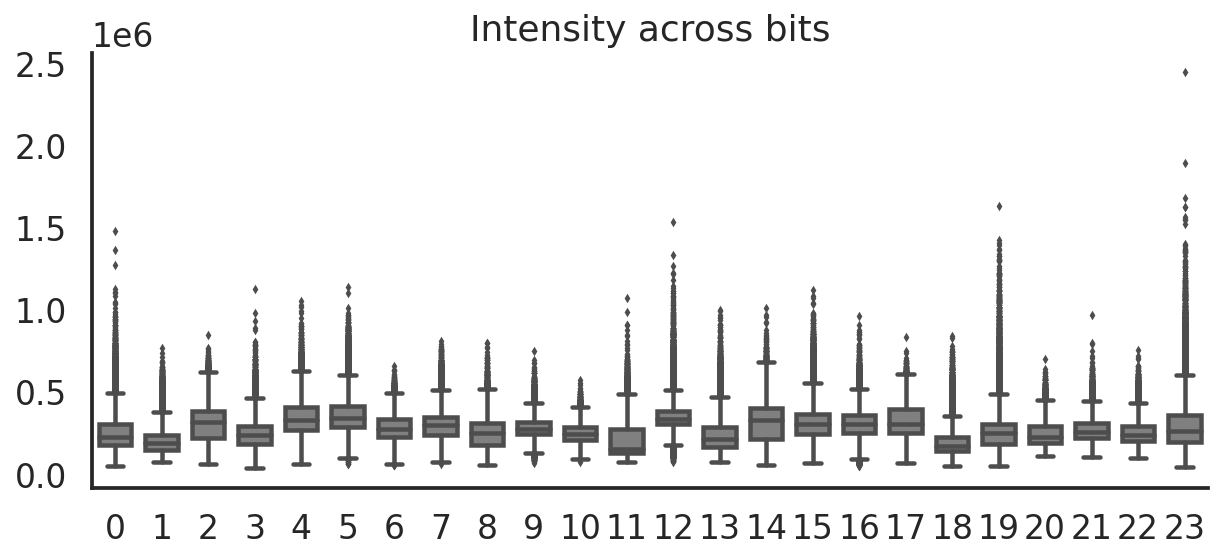

In [9]:
# intensity across bits
fig, ax = plt.subplots(figsize=(10,4))
sns.boxplot(data=adata.X, ax=ax, color='gray', fliersize=2, width=0.7)
ax.set_title('Intensity across bits')
sns.despine(ax=ax)
plt.show()

# head to head comparison with DPNMF
- gene by bit
- intensity
- cell type by bit
- intensity


- ability to resolve cell types?
    - Quantitative metrics -- AUPR for NN on validation set
    - Quantitative metrics for DPNMF? 
    - UMAPs?